In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('PimaIndiansDiabetes.csv')
df.head()

,TimesPregnant,GlucoseConcentration,BloodPrs,SkinThickness,Serum,BMI,DiabetesFunct,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Problem Statement: Predict the patient is A diabetic or not based on all inputs

In [4]:
# Input + Ouput
X = df.drop(columns=['Class'])
X[:2]

,TimesPregnant,GlucoseConcentration,BloodPrs,SkinThickness,Serum,BMI,DiabetesFunct,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31


In [5]:
# Class column is output
df.Class.unique()

array([1, 0], dtype=int64)

<AxesSubplot:>

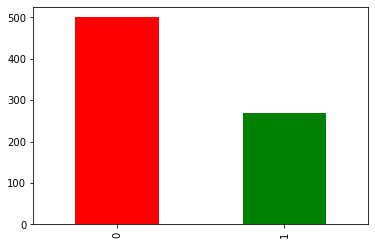

In [6]:
#check data is balanced or not
df.Class.value_counts().plot(kind='bar',color=['red','green'])

<AxesSubplot:ylabel='Class'>

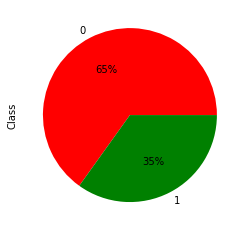

In [7]:
df.Class.value_counts().plot(kind='pie',autopct='%.f%%',colors=['red','green'])

In [8]:
# lets create y
y = df.Class
y[:2]

0    1
1    0
Name: Class, dtype: int64

In [9]:
# Split the dataset into train and test sample
# use 70/30 
from sklearn.model_selection import train_test_split

C:\Users\Rakesh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

In [11]:
# import algorithm
from sklearn.linear_model import LogisticRegression

In [12]:
model = LogisticRegression(max_iter=1000)

In [13]:
#Trianing
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [14]:
#Training accuracy
model.score(X_train,y_train)*100

78.39851024208566

In [15]:
y_test.value_counts()

0    151
1     80
Name: Class, dtype: int64

In [16]:
# Model prediction
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [17]:
pd.Series(y_pred)

0      0
1      0
2      0
3      0
4      1
      ..
226    0
227    0
228    0
229    0
230    0
Length: 231, dtype: int64

In [15]:
print(dir())
# will give a list of data members/objects currently present in an environment

['In', 'LogisticRegression', 'Out', 'X', 'X_test', 'X_train', '_', '_12', '_13', '_14', '_2', '_3', '_4', '_5', '_6', '_7', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i10', '_i11', '_i12', '_i13', '_i14', '_i15', '_i2', '_i3', '_i4', '_i5', '_i6', '_i7', '_i8', '_i9', '_ih', '_ii', '_iii', '_oh', 'df', 'exit', 'get_ipython', 'model', 'pd', 'quit', 'train_test_split', 'y', 'y_pred', 'y_test', 'y_train']


In [16]:
out = pd.Series(y_pred)
out.value_counts()

0    150
1     81
dtype: int64

## Check Performance of a model with diffrent accuracy measures

## Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[120,  31],
       [ 30,  50]], dtype=int64)

Text(33.0, 0.5, 'Actual')

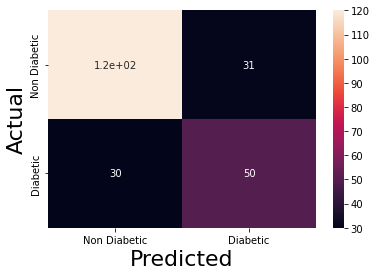

In [19]:
#Plot CM
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm,annot=True,xticklabels=['Non Diabetic','Diabetic'],
            yticklabels=['Non Diabetic','Diabetic'])
plt.xlabel('Predicted',fontsize=22)
plt.ylabel('Actual',fontsize=22)

In [20]:
#Actual Zeros
sum(y_test == 0) 

151

In [21]:
#predicted Zeros
sum(y_pred == 0) 

150

In [22]:
# Actual Non Diabetic and Predicted as Non Diabetic
sum((y_test == 0) & (y_pred==0))

120

In [23]:
# Actual Diabetic and Predicted as Diabetic
sum((y_test == 1) & (y_pred==1))

50

In [24]:
# Actual Diabetic and Predicted as Non Diabetic
sum((y_test == 1) & (y_pred== 0))

30

In [25]:
# Actual Non Diabetic and Predicted as Diabetic
sum((y_test == 0) & (y_pred== 1))

31

# Accuracy

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
#model accuracy/algorithm accuracy
accuracy_score(y_test,y_pred)*100

73.59307359307358

In [28]:
cm

array([[120,  31],
       [ 30,  50]], dtype=int64)

In [29]:
#TP+TN/TOTAL
((120+50)/(120+31+30+50))*100

73.59307359307358

In [30]:
# Q. Difference between score and accuaracy_score

## Precision

In [31]:
from sklearn.metrics import precision_score

In [32]:
precision_score(y_test,y_pred)*100

61.72839506172839

In [33]:
cm

array([[120,  31],
       [ 30,  50]], dtype=int64)

In [34]:
#precision is based on FP False Positive
# TP/TP+FP
(50/(50+31))*100

61.72839506172839

## Recall

In [35]:
from sklearn.metrics import recall_score

In [36]:
recall_score(y_test,y_pred)*100

62.5

In [37]:
#Check manually

## F1 score

In [38]:
from sklearn.metrics import f1_score

In [39]:
f1_score(y_test,y_pred)*100

62.11180124223602

## Classification report

In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [42]:
#support
sum(y_test == 1)

80

In [43]:
len(y_test)

231